## Convolutional Neural Networks - introduction

Long time before CNN Image processing allows better extracion of the images

<table><tr>
<td> <img src="imgs/edges_detection.jpg" width="800" /> </td>
</tr></table>

- NN were already powerful (NN,CNN start dominating over other ML lagorithms)
- The advancements in Computer Vision with Deep Learning has been constructed and perfected with time, primarily over one particular algorithm — a Convolutional Neural Network. (CNN -  breakthrough in image classification was made by CNN)

<table><tr>
<td> <img src="imgs/CNN.jpeg" width="600" /> </td>
</tr></table>

### What is image
* An image is a collection of pixels. For example, a 32-by-32 image has 32×32=1024 pixels.
* Each pixel is an intensity represented by a number in the range [0,255], 0 is black and 255 is white.
* Color images have three dimensions: [width, height, depth] where depth is usually 3. Why is depth 3? That’s because it encodes the intensity of [Red, Green, Blue], i.e., RGB values.

<table><tr>
<td> <img src="imgs/image_pixel.png" width="600" /> </td>
</tr></table>

# If the input is a digit (2D, 3D array of number)
In case of Color image we have 3D

<table><tr>
<td> <img src="imgs/RGB.png" width="600" /> </td>
</tr></table>

## Convolution process
* Image (6x6)
* Filter / Kernel (3x3)
* Pooling (2x2)
* Output (2x2)

A kernel is a small 2D matrix whose contents are based upon the operations to be performed. A kernel maps on the input image by simple matrix multiplication and addition, the output obtained is of lower dimensions and therefore easier to work with.

<table><tr>
<td> <img src="imgs/convolution_process.png" width="1000" /> </td>
</tr></table>

# Just the convolution part (gif)

<table><tr>
<td> <img src="imgs/kernel.gif" width="400" /> </td>
</tr></table>

### But the image has three layers so the kernel works on each layer

<table><tr>
<td> <img src="imgs/kernel3D.gif" width="800" /> </td>
</tr></table>

### Different kernels make different operations on the image

<table><tr>
<td> <img src="imgs/convolution_kernel_example2.png" width="800" /> </td>
</tr></table>

### in CNN the filter weights learn through backpropagation!!!! 

## In tensorflow the Convolution layer is being implemented with the following syntax
`from tensorflow.keras.layers import Conv2D`  
`Conv2D(filters=16,  strides=1, padding='valid', kernel_size=(3, 3), activation='relu', name='conv_1')`

* ***Depth***: The number of filters to use for each layer.  
* ***Stride***: How big of a step to take when sliding the filter across the image, usually 1 (see the convolution GIF above) or 2.
* ***Size***: Size of each convolution filter, e.g., the mean filter is 3-by-3.
* ***Padding***: Whether to use paddings around images when doing convolution. This determines the output image size. (default padding='valid')
  * `valid` 
  * `SAME` 

### padding: valid (default) means no padding (as above) so the output image is smaller as input
When padding == ”VALID”, the input image is not padded. This means that the filter window always stays inside the input image.  This type of padding is called valid because for this padding only the valid and original elements of the input image are considered. When padding == "VALID", there can be a loss of information. Generally, elements on the right and the bottom of the image tend to be ignored. How many elements are ignored depends on the size of the kernel and the stride.

<table><tr>
<td> <img src="imgs/conv_no_padding.gif" width="800" /> </td>
</tr></table>

### padding: SAME (default) means there is padding: the output image is the same as input
When padding == “SAME”, the input is half padded. The padding type is called SAME because the output size is the same as the input size(when stride=1). Using ‘SAME’ ensures that the filter is applied to all the elements of the input. Normally, padding is set to "SAME" while training the model. Output size is mathematically convenient for further computation.

<table><tr>
<td> <img src="imgs/conv_padding.gif" width="800" /> </td>
</tr></table>

# Max pooling is another operation on the image after the convolution it finds the maximum value in the given `pool size`

<table><tr>
<td> <img src="imgs/pooling.jpg" width="600" /> </td>
</tr></table>

## In tensorflow the Pooling layer is being implemented with the following syntax:
`from tensorflow.keras.layers import MaxPooling2D`
`MaxPooling2D(pool_size=(2, 2), name='pool_1')`

# After the convolution and max pooling is done we flatten the image (or whats left from it)

<table><tr>
<td> <img src="imgs/flattening.png" width="600" /> </td>
</tr></table>

## In tensorflow the Flattening layer is being implemented with the following syntax:
`from tensorflow.keras.layers import Flatten`
`Flatten(name='flatten_layer')`

## The order of the layers in CNN:
* Input layer    
* Convolution layer
* Pooling layer
* Convolution layer
* Pooling layer
* Flattening layer
* Dense layer
* Dense layer
* output layer ( in case of classification the activation function is: `Sigmoid`)

# CNN with Tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


#### Load and inspect CIFAR-10 dataset
The CIFAR-10 dataset consists of, in total, 60000 color images, each with one of 10 labels: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. For an introduction and a download, see [this link](https://www.cs.toronto.edu/~kriz/cifar.html).

In [2]:
# Import the CIFAR-10 dataset and rescale the pixel values

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0


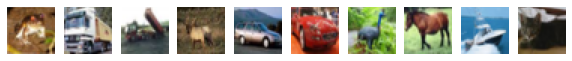

In [3]:
# Plot the first 10 CIFAR-10 images

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train[0].shape

(32, 32, 3)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D

In [7]:
def get_model(input_shape):
    model = Sequential([InputLayer(input_shape=input_shape),
                        Conv2D(filters=32,  kernel_size=(3, 3), activation='relu', name='conv_1'),
                        MaxPooling2D(pool_size=(2, 2), name='pool_1'),
                        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='conv_2'),
                        MaxPooling2D(pool_size=(2, 2), name='pool_2'),
                        Flatten(name='flatten'),
                        Dense(units=64, activation='relu', name='dense_1'),
                        Dense(units=10, activation='softmax', name='dense_2')])
    
    return model

In [8]:
def compile_model(model):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Introduce function to test model accuracy

def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [10]:
# Create an instance of the model and show model summary
model=get_model(X_train[0].shape)
compile_model(model)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 15, 15, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 13, 13, 64)        18496     
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                6

In [12]:
get_test_accuracy(model,X_test,y_test)

accuracy: 0.111


In [13]:
# Fit model, with simple checkpoint which saves (and overwrites) model weights every epoch
epochs=5
history=model.fit(X_train,y_train,epochs=epochs,validation_split=0.1,verbose=1)

Epoch 1/5
1407/1407 [==============================] - 33s 23ms/step - loss: 1.4558 - accuracy: 0.4770 - val_loss: 1.1852 - val_accuracy: 0.5830
Epoch 2/5
1407/1407 [==============================] - 37s 27ms/step - loss: 1.1133 - accuracy: 0.6087 - val_loss: 1.0730 - val_accuracy: 0.6214
Epoch 3/5
1407/1407 [==============================] - 36s 26ms/step - loss: 0.9825 - accuracy: 0.6552 - val_loss: 0.9840 - val_accuracy: 0.6620
Epoch 4/5
1407/1407 [==============================] - 35s 25ms/step - loss: 0.8949 - accuracy: 0.6885 - val_loss: 0.9563 - val_accuracy: 0.6790
Epoch 5/5
1407/1407 [==============================] - 35s 25ms/step - loss: 0.8227 - accuracy: 0.7132 - val_loss: 0.9208 - val_accuracy: 0.6888


In [14]:
get_test_accuracy(model,X_test,y_test)

accuracy: 0.673


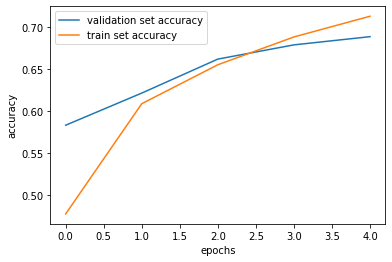

In [15]:
import matplotlib.pyplot as plt
xvals=range(epochs)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, history.history['val_accuracy'],label='validation set accuracy')
ax.plot(xvals, history.history['accuracy'],label='train set accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

## from_digits=True
* loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) - is another way to say normalize the output in terms of probabitlity

In [16]:
def compile_model2(model):
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# Softmax function is called when logit=True (normalized output)

In [17]:
def get_model2(input_shape):
    model = Sequential([InputLayer(input_shape=input_shape),
                        Conv2D(filters=32,  kernel_size=(3, 3), activation='relu', name='conv_1'),
                        MaxPooling2D(pool_size=(2, 2), name='pool_1'),
                        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='conv_2'),
                        MaxPooling2D(pool_size=(2, 2), name='pool_2'),
                        Flatten(name='flatten'),
                        Dense(units=64, activation='relu', name='dense_1'),
                        Dense(units=10, name='dense_2')])
    
    return model

In [18]:
model=get_model2(X_train[0].shape)
compile_model2(model)